<div align="center">
      <h1>Training the Multilayer Perceptron (MLP)</h1>
      <hr>
      <p>In this notebook, we will train the MLP on the CIFAR-10 dataset. We will show the effect of different hyperparameters on the training process.</p>
</div>

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


CIFAR-10 dataset already exists


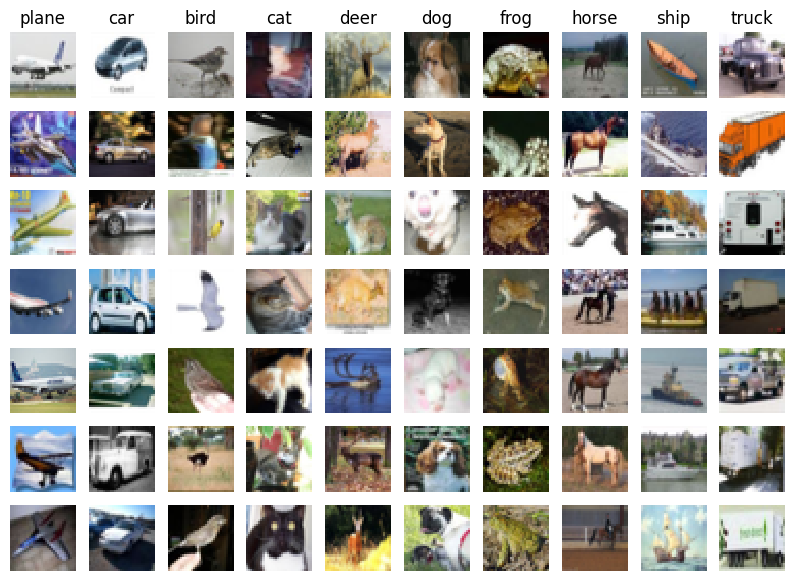

---------------- Training data ----------------
X_train shape: (45000, 32, 32, 3), y_train shape: (45000,)

---------------- Validation data ----------------
X_val shape: (5000, 32, 32, 3), y_val shape: (5000,)

---------------- Testing data ----------------
X_test shape: (10000, 32, 32, 3), y_test shape: (10000,)

---------------- Dataset info ----------------
Number of classes: 10
Number of features: 3072
Number of samples in dataset: 60000
Number of samples in training set: 45000, which is 75.00% of the dataset
Number of samples in validation set: 5000, which is 8.33% of the dataset
Number of samples in testing set: 10000, which is 16.67% of the dataset
arrays: torch.Size([45000, 3072])


In [7]:
import torch
from utils import load_cifar10, reshape_to_vectors, dataset_stats, normalize_torch

# download the CIFAR-10 dataset
cifar10_dir = './data/datasets/CIFAR10'
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
X_train, y_train, X_val, y_val, X_test, y_test = load_cifar10(cifar10_dir, visualize_samples=True)

# Print out the dataset statistics and visualize a few samples
num_features, num_classes, num_samples = dataset_stats(X_train, y_train, X_val, y_val, X_test, y_test, verbose=True)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()

X_val = torch.from_numpy(X_val).float()
y_val = torch.from_numpy(y_val).long()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()

# Reshape the data to vectors and normalize them
X_train, X_val, X_test = reshape_to_vectors(X_train, X_val, X_test)
data = normalize_torch(X_train, X_val, X_test)
X_train, X_val, X_test = data['normalized_arrays']

## Training the MLP

This assignment is all about choosing the right hyperparameters for the MLP. You will have to experiment with different values for the hyperparameters and observe the effect on the training process. Your task is to achieve the highest possible accuracy on the test set. Don't worry about validation set for now, the validation and test set are the same in this assignment. 

The hyperparameters that you will have to experiment with are:

In [8]:
# Hyperparameters for the MLP
hidden_dim_1 = 50  # the number of hidden units in the first hidden layer (int)
hidden_dim_2 = 50  # the number of hidden units in the second hidden layer (int)
weight_scale = None  # the standard deviation of the normal distribution used for weight init (float)
reg = None  # the regularization strength (float)
learning_rate = None  # the learning rate (float)
batch_size = None  # the batch size (int)
num_iters = None  # the number of iterations (int)

Training: 100%|██████████| 15000/15000 [00:47<00:00, 317.43it/s]


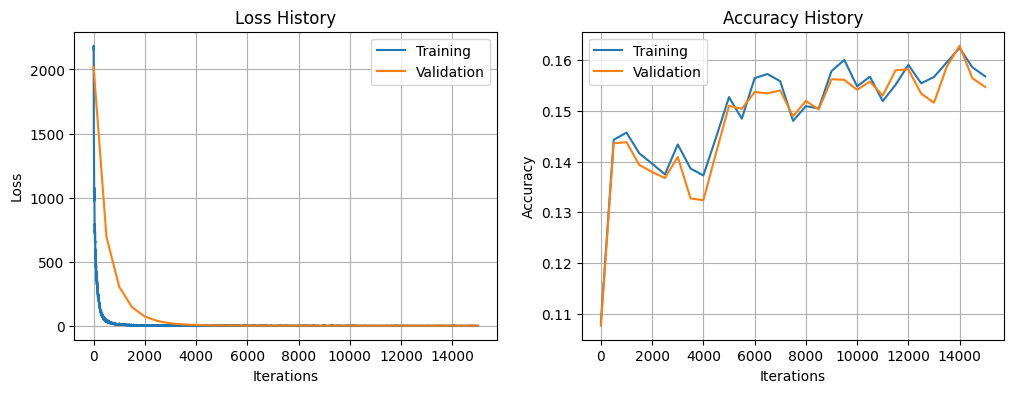

In [11]:
import numpy as np
from utils import plot_training
from assignments_solution.mlp_classifier import MLPClassifier

np.random.seed(69)

# Train the MLP with ReLU activation function
mlp_relu = MLPClassifier(num_features, 
                         hidden_dim_1, 
                         hidden_dim_2, 
                         num_classes, 
                         reg=1e-6,
                         learning_rate=1e-3, 
                         batch_size=128, 
                         num_iters=15000, 
                         verbose=True)
relu_loss_history, relu_acc_history = mlp_relu.train(X_train, y_train, X_val, y_val)

# Plot the training loss and accuracy and visualize the decision boundaries
plot_training(relu_loss_history, relu_acc_history, ema=True, alpha=0.5)

## Training Summary

Share a brief summary of your training results. Discuss the hyperparameters you experimented with and their impact on the training process. Highlight the highest accuracy you attained and the ultimate accuracy on the test and training sets. Ensure to include visuals showcasing (images) a suboptimal training process and the most successful training process you accomplished. Elaborate on the distinctions between these two training scenarios.